# Volume-wise T2*/S0 estimation with `t2smap`

Use {py:func}`tedana.workflows.t2smap_workflow` {cite:p}`DuPre2021` to calculate volume-wise T2*/S0, as in {cite:t}`power2018ridding` and {cite:t}`HEUNIS2021118244`.

In [1]:
import os
import matplotlib.pyplot as plt
from glob import glob

import numpy as np
import pandas as pd
from myst_nb import glue
from nilearn import image, plotting
from tedana import workflows

from repo2data.repo2data import Repo2Data

# Install the data if running locally, or points to cached data if running on neurolibre
DATA_REQ_FILE = os.path.join("../binder/data_requirement.json")

# Download data
repo2data = Repo2Data(DATA_REQ_FILE)
data_path = repo2data.install()
data_path = os.path.abspath(os.path.join(data_path[0], "data"))

/opt/hostedtoolcache/Python/3.7.12/x64/lib/python3.7/site-packages/nilearn/datasets/__init__.py:96: FutureWarning: Fetchers from the nilearn.datasets module will be updated in version 0.9 to return python strings instead of bytes and Pandas dataframes instead of Numpy arrays.
  "Numpy arrays.", FutureWarning)
Module `duecredit` not successfully imported due to "No module named 'duecredit'". Package functionality unaffected.


Failed to import duecredit due to No module named 'duecredit'


---- repo2data starting ----
/opt/hostedtoolcache/Python/3.7.12/x64/lib/python3.7/site-packages/repo2data
Config from file :
../binder/data_requirement.json
Destination:
./../data/multi-echo-data-analysis

Info : ./../data/multi-echo-data-analysis already downloaded


In [2]:
func_dir = os.path.join(data_path, "sub-04570/func/")
data_files = [
    os.path.join(func_dir, "sub-04570_task-rest_echo-1_space-scanner_desc-partialPreproc_bold.nii.gz"),
    os.path.join(func_dir, "sub-04570_task-rest_echo-2_space-scanner_desc-partialPreproc_bold.nii.gz"),
    os.path.join(func_dir, "sub-04570_task-rest_echo-3_space-scanner_desc-partialPreproc_bold.nii.gz"),
    os.path.join(func_dir, "sub-04570_task-rest_echo-4_space-scanner_desc-partialPreproc_bold.nii.gz"),
]
echo_times = [12., 28., 44., 60.]
mask_file = os.path.join(func_dir, "sub-04570_task-rest_space-scanner_desc-brain_mask.nii.gz")
confounds_file = os.path.join(func_dir, "sub-04570_task-rest_desc-confounds_timeseries.tsv")

out_dir = os.path.join(data_path, "fit")

In [3]:
workflows.t2smap_workflow(
    data_files,
    echo_times,
    out_dir=out_dir,
    mask=mask_file,
    prefix="sub-04570_task-rest_space-scanner",
    fittype="loglin",
    fitmode="ts",
)

INFO     t2smap:t2smap_workflow:229 Using output directory: /home/runner/work/multi-echo-data-analysis/multi-echo-data-analysis/data/multi-echo-data-analysis/data/fit


INFO     t2smap:t2smap_workflow:239 Loading input data: ['/home/runner/work/multi-echo-data-analysis/multi-echo-data-analysis/data/multi-echo-data-analysis/data/sub-04570/func/sub-04570_task-rest_echo-1_space-scanner_desc-partialPreproc_bold.nii.gz', '/home/runner/work/multi-echo-data-analysis/multi-echo-data-analysis/data/multi-echo-data-analysis/data/sub-04570/func/sub-04570_task-rest_echo-2_space-scanner_desc-partialPreproc_bold.nii.gz', '/home/runner/work/multi-echo-data-analysis/multi-echo-data-analysis/data/multi-echo-data-analysis/data/sub-04570/func/sub-04570_task-rest_echo-3_space-scanner_desc-partialPreproc_bold.nii.gz', '/home/runner/work/multi-echo-data-analysis/multi-echo-data-analysis/data/multi-echo-data-analysis/data/sub-04570/func/sub-04570_task-rest_echo-4_space-scanner_desc-partialPreproc_bold.nii.gz']


INFO     t2smap:t2smap_workflow:255 Using user-defined mask


INFO     t2smap:t2smap_workflow:258 Computing adaptive T2* map


INFO     t2smap:t2smap_workflow:275 Computing optimal combination


INFO     combine:make_optcom:242 Optimally combining data with voxel- and volume-wise T2* estimates


INFO     t2smap:t2smap_workflow:320 Workflow completed


In [4]:
out_files = sorted(glob(os.path.join(out_dir, "*")))
out_files = [os.path.basename(f) for f in out_files]
print("\n".join(out_files))

sub-04570_task-rest_space-scanner_S0map.nii.gz
sub-04570_task-rest_space-scanner_T2starmap.nii.gz
sub-04570_task-rest_space-scanner_dataset_description.json
sub-04570_task-rest_space-scanner_desc-limited_S0map.nii.gz
sub-04570_task-rest_space-scanner_desc-limited_T2starmap.nii.gz
sub-04570_task-rest_space-scanner_desc-optcom_bold.nii.gz


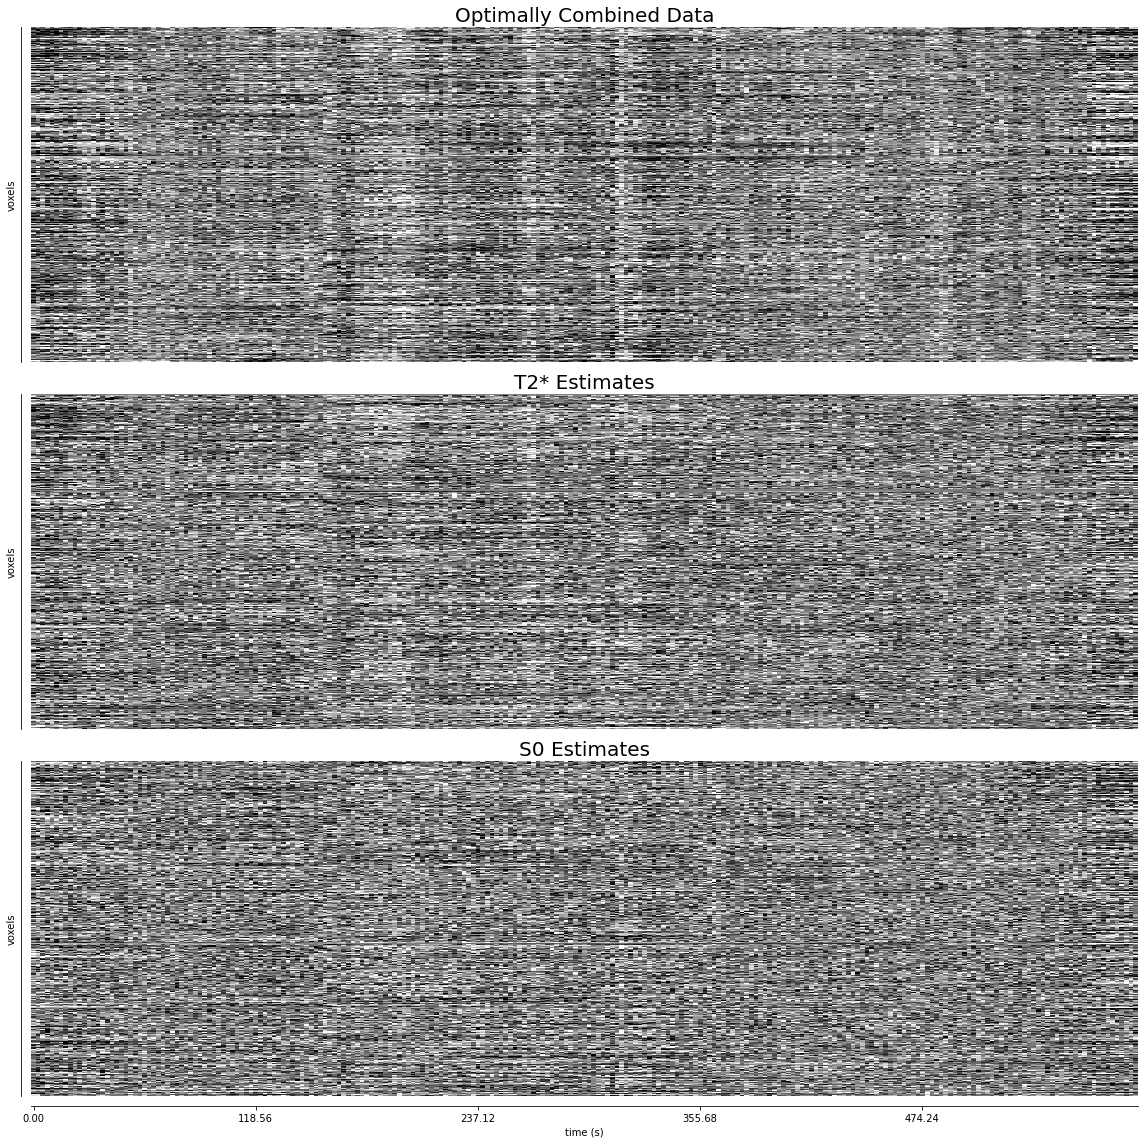

In [5]:
fig, axes = plt.subplots(figsize=(16, 16), nrows=3)

plotting.plot_carpet(
    os.path.join(out_dir, "sub-04570_task-rest_space-scanner_desc-optcom_bold.nii.gz"),
    axes=axes[0],
    figure=fig,
)
axes[0].set_title("Optimally Combined Data", fontsize=20)
plotting.plot_carpet(
    os.path.join(out_dir, "sub-04570_task-rest_space-scanner_T2starmap.nii.gz"),
    axes=axes[1],
    figure=fig,
)
axes[1].set_title("T2* Estimates", fontsize=20)
plotting.plot_carpet(
    os.path.join(out_dir, "sub-04570_task-rest_space-scanner_S0map.nii.gz"),
    axes=axes[2],
    figure=fig,
)
axes[2].set_title("S0 Estimates", fontsize=20)
axes[0].xaxis.set_visible(False)
axes[1].xaxis.set_visible(False)
axes[0].spines["bottom"].set_visible(False)
axes[1].spines["bottom"].set_visible(False)
fig.tight_layout()

glue("figure_volumewise_t2ss0_carpets", fig, display=False)

```{glue:figure} figure_volumewise_t2ss0_carpets
:name: "figure_volumewise_t2ss0_carpets"
:align: center

Carpet plots of optimally combined data, along with volume-wise T2* and S0 estimates.
```

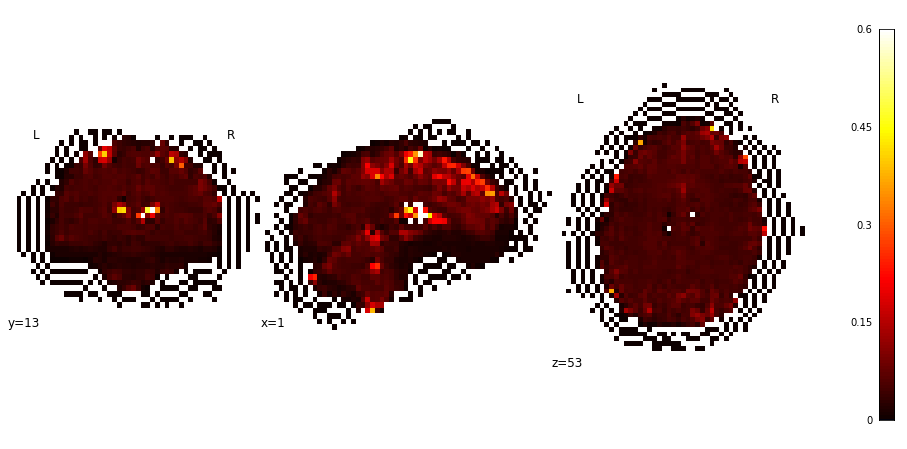

In [6]:
fig, ax = plt.subplots(figsize=(16, 8))
plotting.plot_stat_map(
    image.mean_img(os.path.join(out_dir, "sub-04570_task-rest_space-scanner_T2starmap.nii.gz")),
    vmax=0.6,
    draw_cross=False,
    bg_img=None,
    figure=fig,
    axes=ax,
)
glue("figure_mean_volumewise_t2s", fig, display=False)

```{glue:figure} figure_mean_volumewise_t2s
:name: "figure_mean_volumewise_t2s"
:align: center

Mean map from the volume-wise T2* estimation.
```

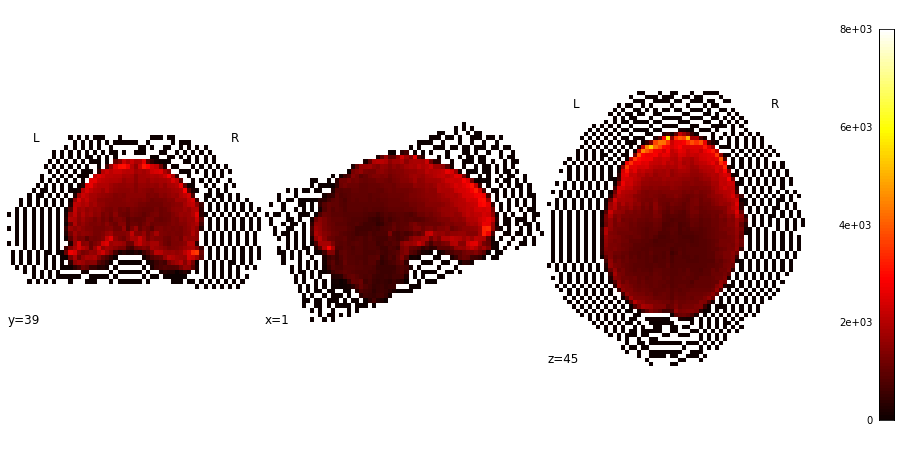

In [7]:
fig, ax = plt.subplots(figsize=(16, 8))
plotting.plot_stat_map(
    image.mean_img(os.path.join(out_dir, "sub-04570_task-rest_space-scanner_S0map.nii.gz")),
    vmax=8000,
    draw_cross=False,
    bg_img=None,
    figure=fig,
    axes=ax,
)
glue("figure_mean_volumewise_s0", fig, display=False)

```{glue:figure} figure_mean_volumewise_s0
:name: "figure_mean_volumewise_s0"
:align: center

Mean map from the volume-wise S0 estimation.
```

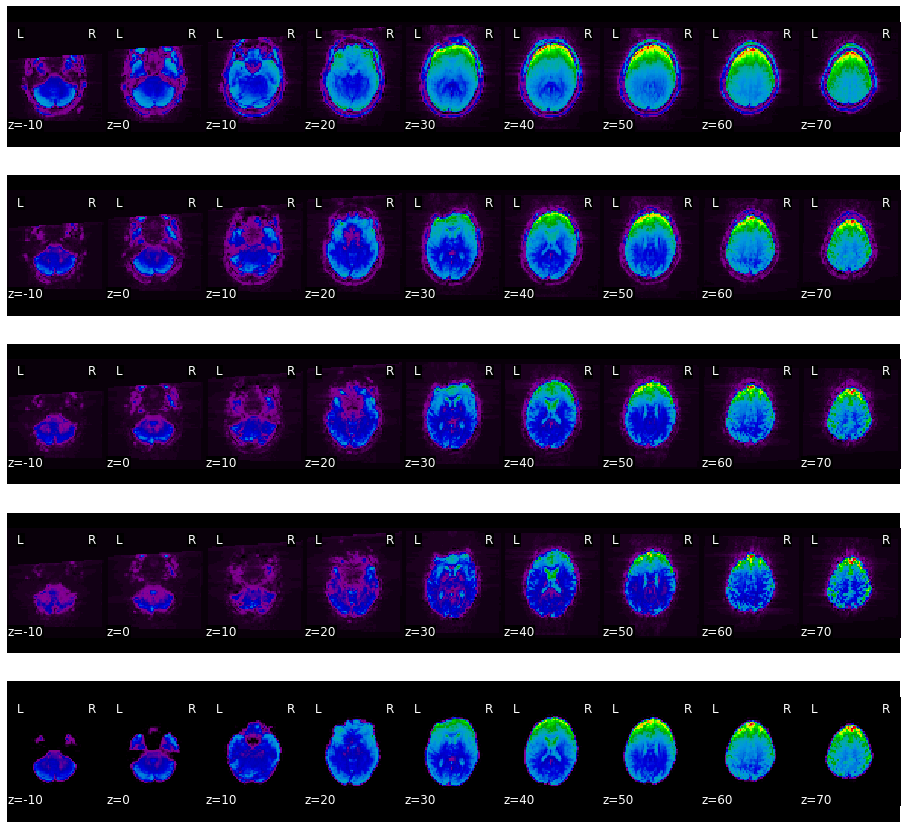

In [8]:
fig, axes = plt.subplots(figsize=(16, 15), nrows=5)
plotting.plot_epi(
    image.mean_img(data_files[0]),
    draw_cross=False,
    bg_img=None,
    cut_coords=[-10, 0, 10, 20, 30, 40, 50, 60, 70],
    display_mode="z",
    axes=axes[0],
)
plotting.plot_epi(
    image.mean_img(data_files[1]),
    draw_cross=False,
    bg_img=None,
    cut_coords=[-10, 0, 10, 20, 30, 40, 50, 60, 70],
    display_mode="z",
    axes=axes[1],
)
plotting.plot_epi(
    image.mean_img(data_files[2]),
    draw_cross=False,
    bg_img=None,
    cut_coords=[-10, 0, 10, 20, 30, 40, 50, 60, 70],
    display_mode="z",
    axes=axes[2],
)
plotting.plot_epi(
    image.mean_img(data_files[3]),
    draw_cross=False,
    bg_img=None,
    cut_coords=[-10, 0, 10, 20, 30, 40, 50, 60, 70],
    display_mode="z",
    axes=axes[3],
)
plotting.plot_epi(
    image.mean_img(os.path.join(out_dir, "sub-04570_task-rest_space-scanner_desc-optcom_bold.nii.gz")),
    draw_cross=False,
    bg_img=None,
    cut_coords=[-10, 0, 10, 20, 30, 40, 50, 60, 70],
    display_mode="z",
    axes=axes[4],
)
glue("figure_mean_echos_and_optcom", fig, display=False)

```{glue:figure} figure_mean_echos_and_optcom
:name: "figure_mean_echos_and_optcom"
:align: center

Mean images of the echo-wise data and the optimally combined data.
```

<string>:1: RuntimeWarning: invalid value encountered in true_divide


/opt/hostedtoolcache/Python/3.7.12/x64/lib/python3.7/site-packages/nilearn/_utils/niimg.py:62: UserWarning: Non-finite values detected. These values will be replaced with zeros.
  "Non-finite values detected. "


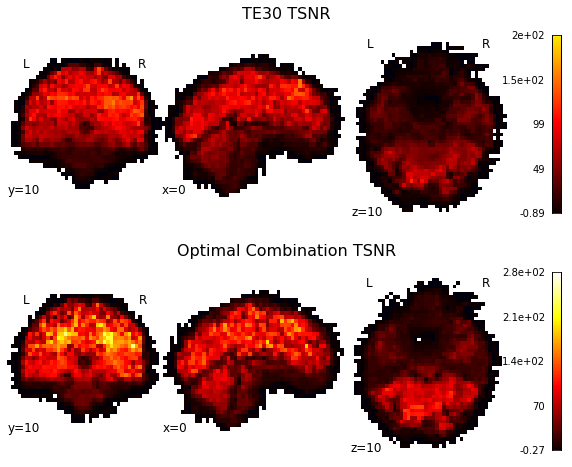

In [9]:
te30_tsnr = image.math_img(
    '(np.nanmean(img, axis=3) / np.nanstd(img, axis=3)) * mask',
    img=data_files[1],
    mask=mask_file,
)
oc_tsnr = image.math_img(
    '(np.nanmean(img, axis=3) / np.nanstd(img, axis=3)) * mask',
    img=os.path.join(out_dir, "sub-04570_task-rest_space-scanner_desc-optcom_bold.nii.gz"),
    mask=mask_file,
)
vmax = np.nanmax(np.abs(oc_tsnr.get_fdata()))

fig, axes = plt.subplots(figsize=(10, 8), nrows=2)
plotting.plot_stat_map(
    te30_tsnr,
    draw_cross=False,
    bg_img=None,
    threshold=0.1,
    cut_coords=[0, 10, 10],
    vmax=vmax,
    symmetric_cbar=False,
    axes=axes[0],
)
axes[0].set_title("TE30 TSNR", fontsize=16)
plotting.plot_stat_map(
    oc_tsnr,
    draw_cross=False,
    bg_img=None,
    threshold=0.1,
    cut_coords=[0, 10, 10],
    vmax=vmax,
    symmetric_cbar=False,
    axes=axes[1],
)
axes[1].set_title("Optimal Combination TSNR", fontsize=16)
glue("figure_t2snr_te30_and_optcom", fig, display=False)

```{glue:figure} figure_t2snr_te30_and_optcom
:name: "figure_t2snr_te30_and_optcom"
:align: center

TSNR map of the second echo (TE30) and the optimally combined data.
```

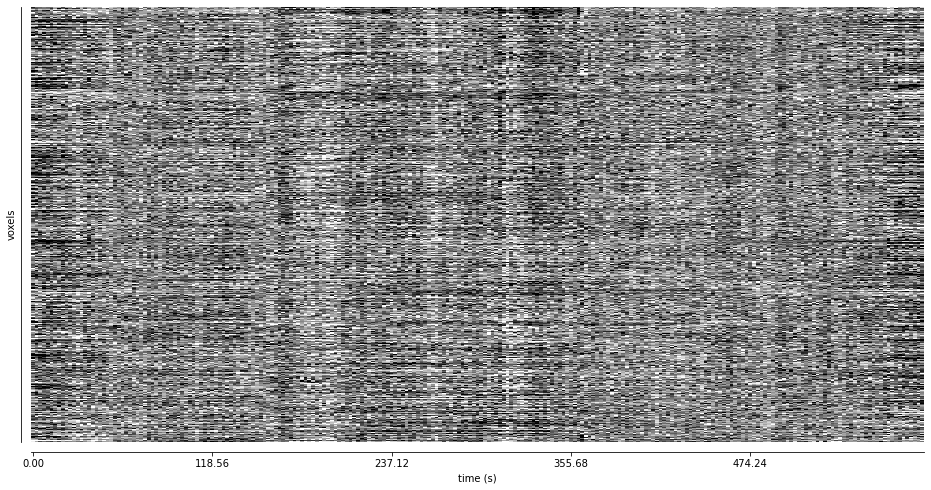

In [10]:
fig, ax = plt.subplots(figsize=(16, 8))
plotting.plot_carpet(
    data_files[1],
    axes=ax,
)
glue("figure_echo3_carpet", fig, display=False)

```{glue:figure} figure_echo3_carpet
:name: "figure_echo3_carpet"
:align: center

Carpet plot of the third echo.
```

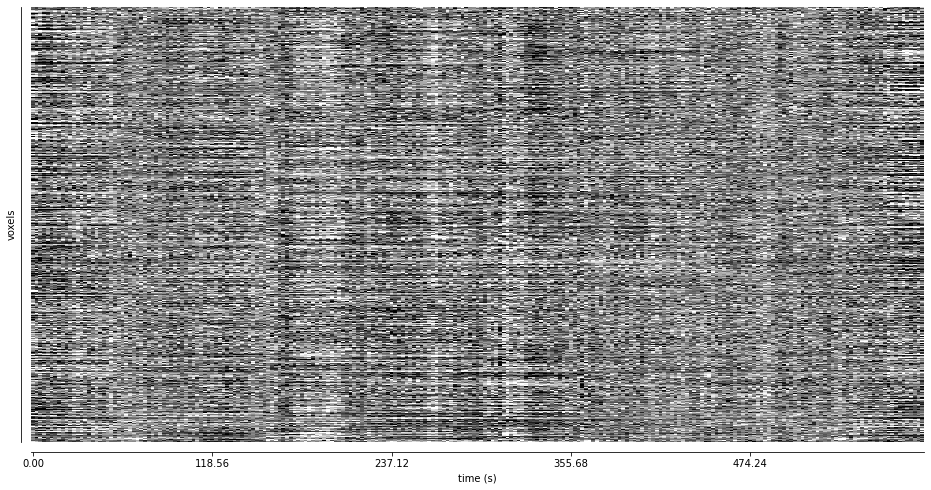

In [11]:
fig, ax = plt.subplots(figsize=(16, 8))
plotting.plot_carpet(
    os.path.join(out_dir, "sub-04570_task-rest_space-scanner_desc-optcom_bold.nii.gz"),
    axes=ax,
)
glue("figure_carpet_optcom", fig, display=False)

```{glue:figure} figure_carpet_optcom
:name: "figure_carpet_optcom"
:align: center

Carpet plot of the optimally combined data.
```